In [1]:
import pandas as pd

In [2]:
# load the data sets

transaction_file = "transaction_data.csv"
behavior_file = "purchase_behaviour.csv"

df_transactions = pd.read_csv(transaction_file)
df_behavior = pd.read_csv(behavior_file)

In [5]:
df_transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
df_behavior.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [8]:
# top 3 most profitable projects

top_products = (
    df_transactions.groupby("PROD_NAME")
    .agg({"TOT_SALES": "sum"})
    .sort_values(by="TOT_SALES", ascending=False)
    .head(3)
)
print("Top 3 Most Profitable Products:\n", top_products)

Top 3 Most Profitable Products:
                                           TOT_SALES
PROD_NAME                                          
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2


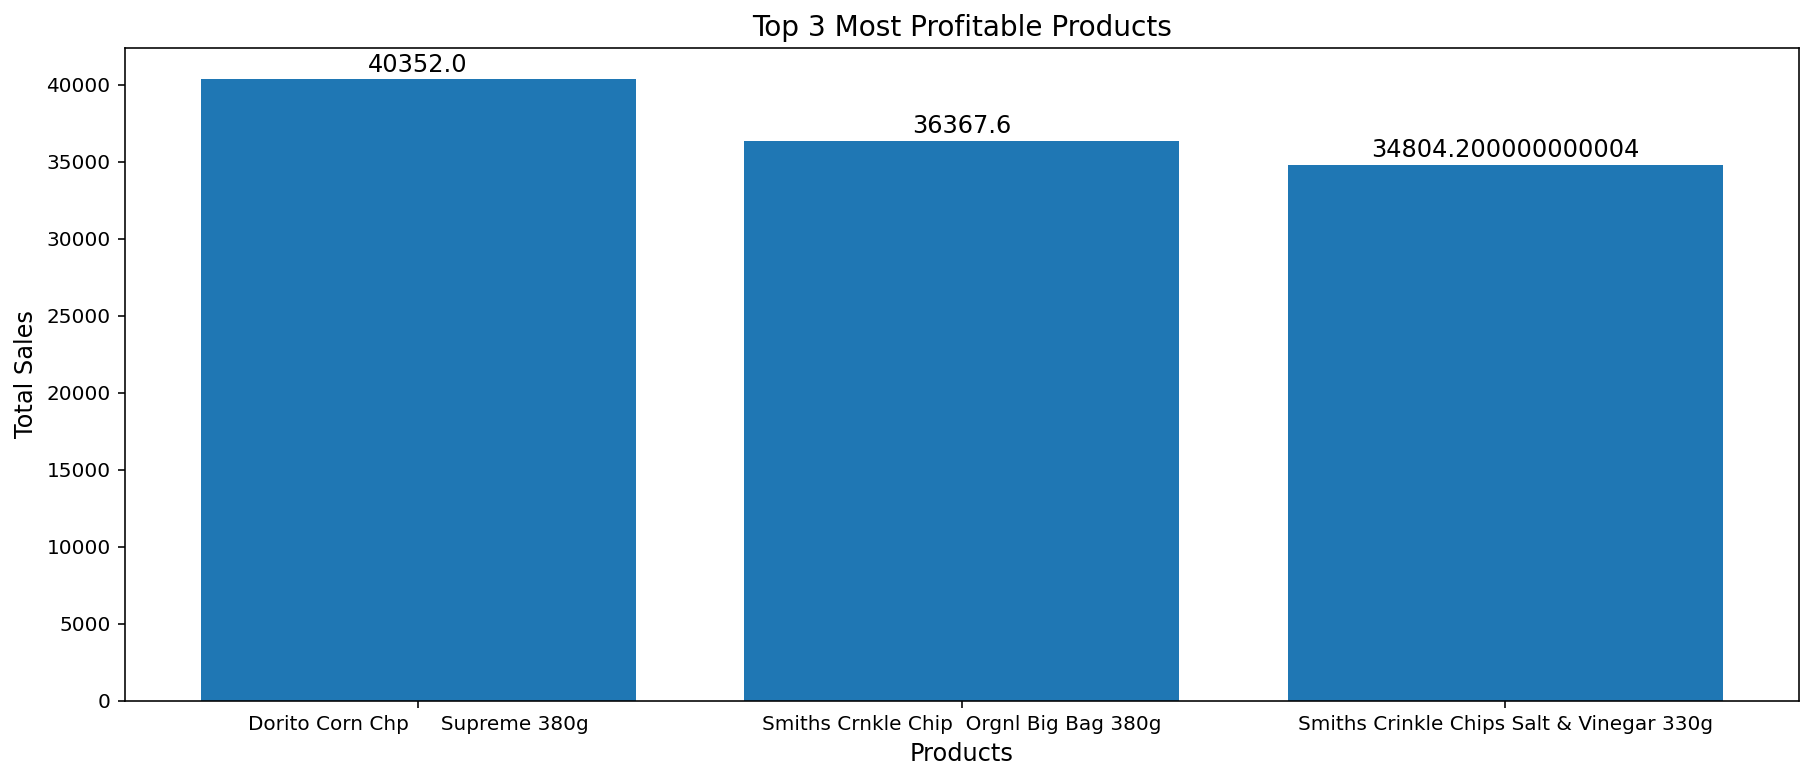

In [19]:
import matplotlib.pyplot as plt

# Extract product names and sales values
top_products_names = top_products.index
top_products_sales = top_products["TOT_SALES"]

# Create a bar chart
plt.figure(figsize=(15, 6))
plt.bar(top_products_names, top_products_sales,)


# Add title and labels
plt.title("Top 3 Most Profitable Products", fontsize=14)
plt.xlabel("Products", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)

# Display values on top of bars
for i, value in enumerate(top_products_sales):
    plt.text(i, value + 500, str(value), ha='center', fontsize=12)

# Show the chart
plt.show()

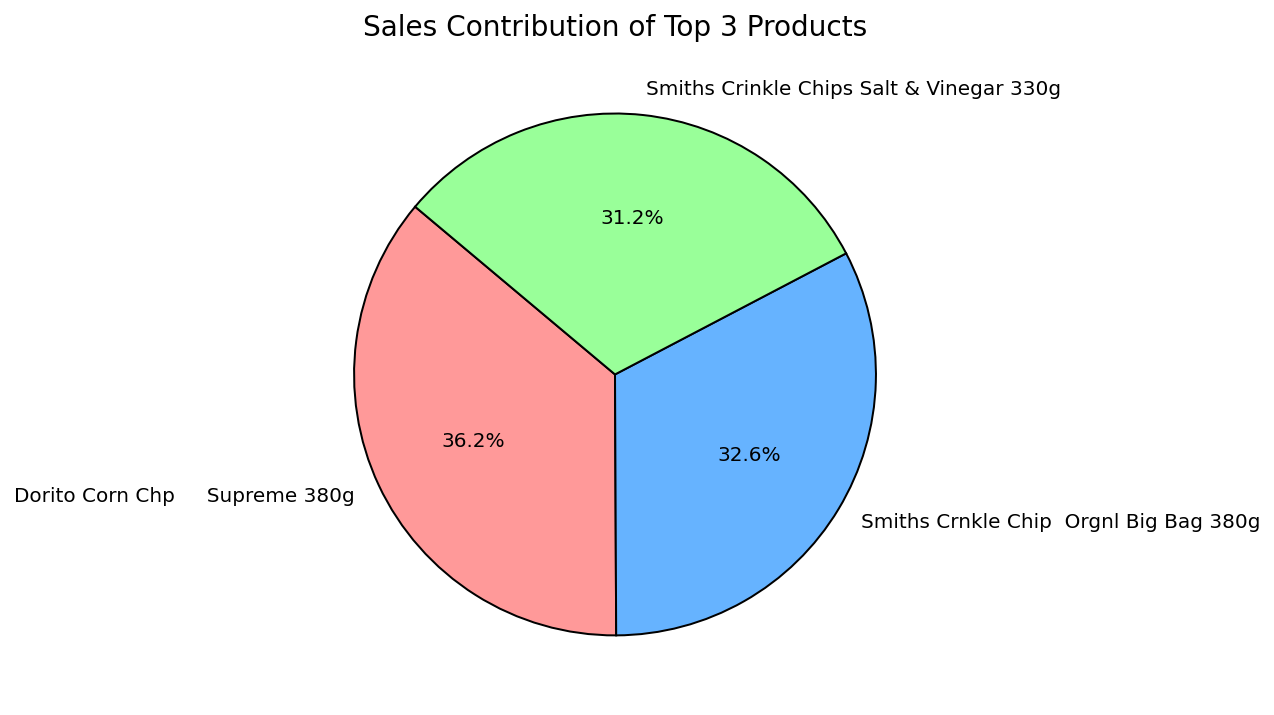

In [11]:
# Pie chroportion of sales among top 3 products
plt.figure(figsize=(6, 6))
plt.pie(
    top_products_sales, 
    labels=top_products_names, 
    autopct="%1.1f%%", 
    colors=["#FF9999", "#66B3FF", "#99FF99"],
    startangle=140, 
    wedgeprops={"edgecolor": "black"}
)

plt.title("Sales Contribution of Top 3 Products", fontsize=14)
plt.show()

In [21]:
import seaborn as sns  # Seaborn for improved aesthetics

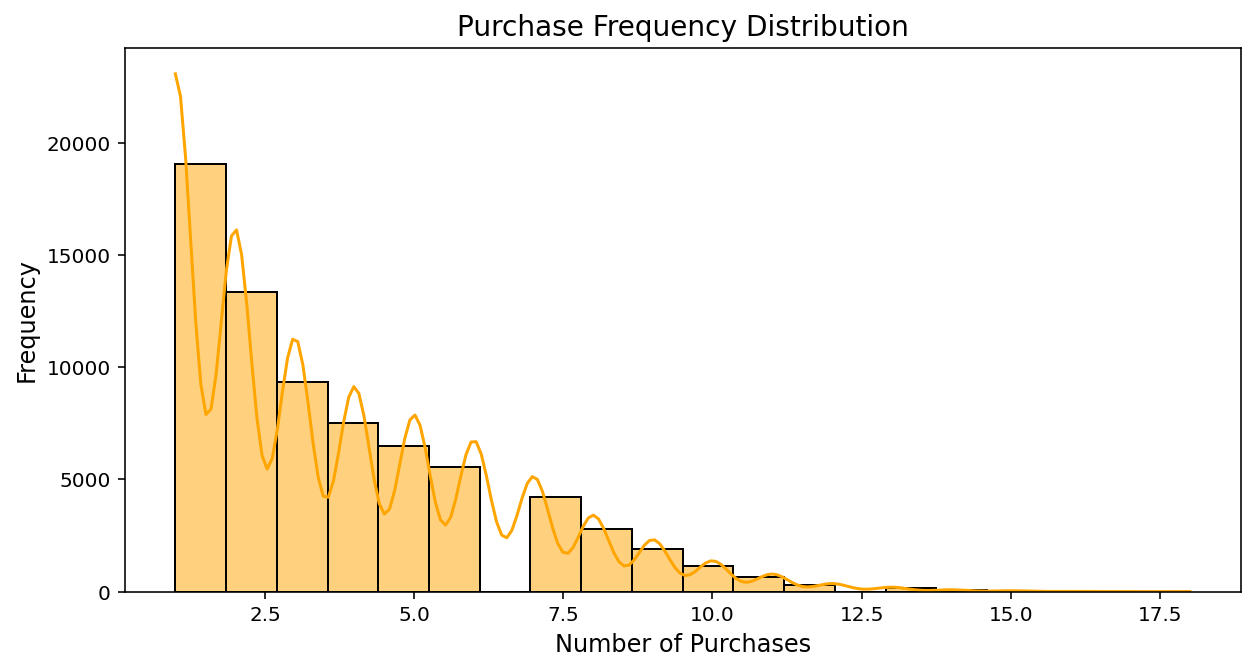

In [25]:
# Purchase Frequency Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_transactions.groupby("LYLTY_CARD_NBR")["TXN_ID"].count(), bins=20, color="orange", kde=True)
plt.title("Purchase Frequency Distribution", fontsize=14)
plt.xlabel("Number of Purchases", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


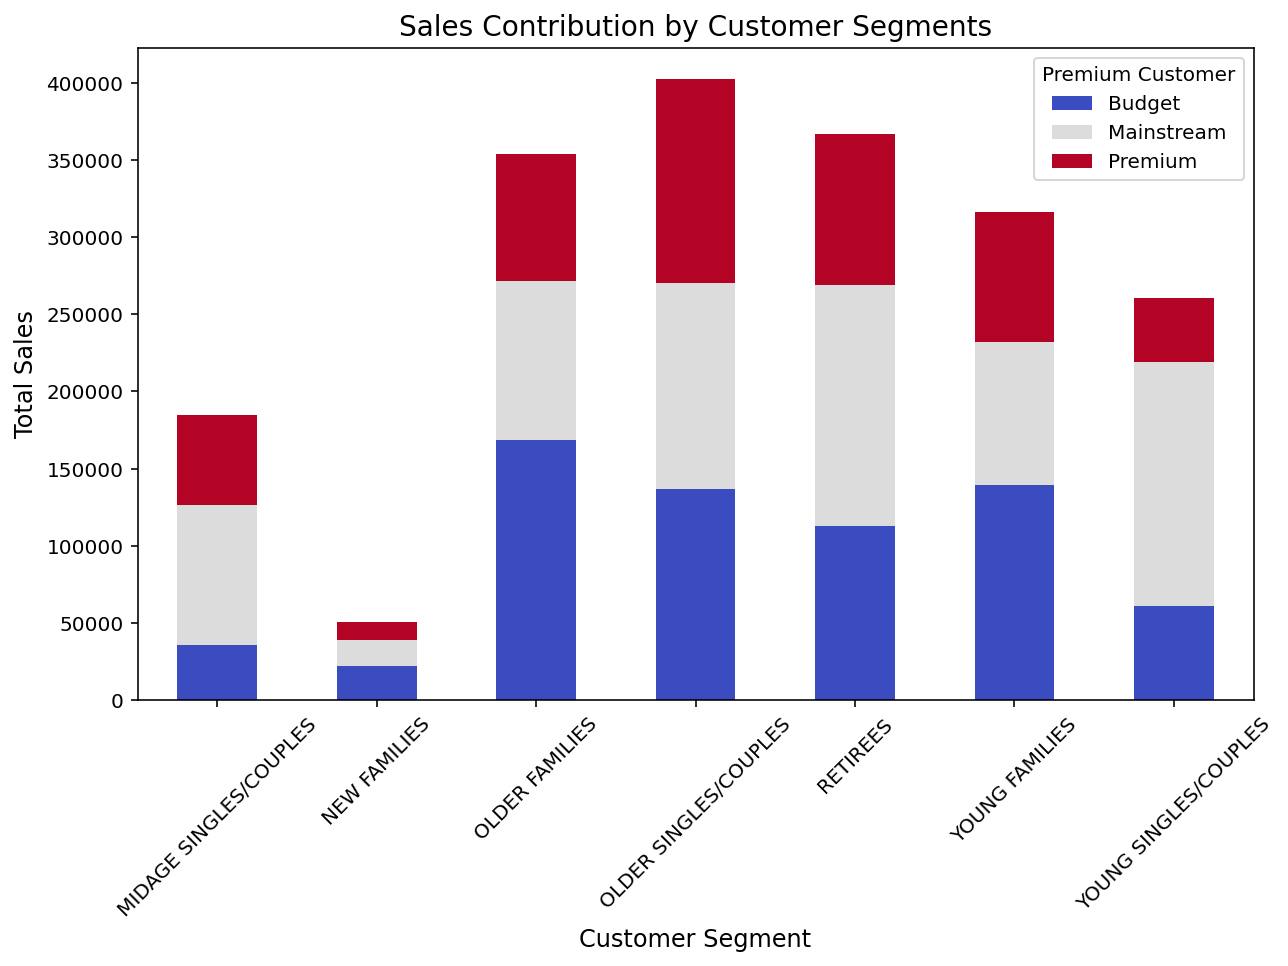

In [26]:
# Sales Contribution by Customer Segments
df_loyal_customers = df_transactions.groupby(["LYLTY_CARD_NBR"]).agg({"TOT_SALES": "sum"}).reset_index()
df_loyal_customers = df_loyal_customers.merge(df_behavior, on="LYLTY_CARD_NBR", how="left")

segment_sales = df_loyal_customers.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().unstack()

segment_sales.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm")
plt.title("Sales Contribution by Customer Segments", fontsize=14)
plt.xlabel("Customer Segment", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.legend(title="Premium Customer")
plt.xticks(rotation=45)
plt.show()

In [10]:
# identifying the most loyal customers

customer_spending = (
    df_transactions.groupby("LYLTY_CARD_NBR")
    .agg({"TXN_ID": "count", "TOT_SALES": "sum"})
    .rename(columns={"TXN_ID": "PURCHASE_COUNT"})
    .sort_values(by=["PURCHASE_COUNT", "TOT_SALES"], ascending=[False, False])
)

In [11]:
# merge with customer segments

df_loyal_customers = customer_spending.merge(df_behavior, on="LYLTY_CARD_NBR", how="left")

In [12]:
# Identify the most frequent customer segment

loyal_segment = (
    df_loyal_customers.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])
    .agg({"PURCHASE_COUNT": "sum", "TOT_SALES": "sum"})
    .sort_values(by=["PURCHASE_COUNT", "TOT_SALES"], ascending=[False, False])
)

print("Most Loyal Customer Segment:\n", loyal_segment.head(1))

Most Loyal Customer Segment:
                                  PURCHASE_COUNT  TOT_SALES
LIFESTAGE      PREMIUM_CUSTOMER                           
OLDER FAMILIES Budget                     23160  168363.25


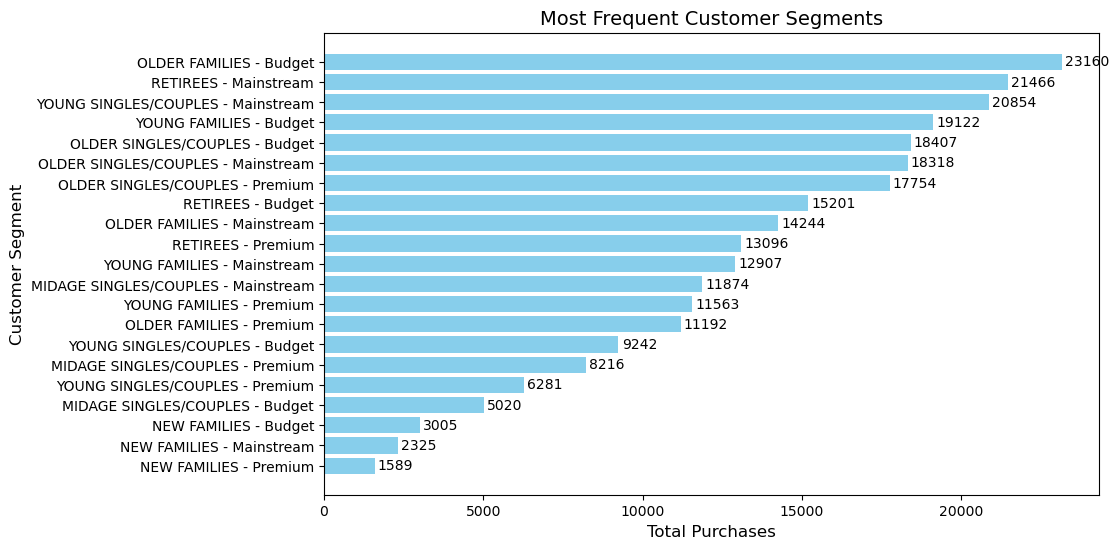

In [25]:
import matplotlib.pyplot as plt

# Extract segment names and purchase counts
segment_names = loyal_segment.index.to_list()
purchase_counts = loyal_segment["PURCHASE_COUNT"]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(segment_names)), purchase_counts, color='skyblue')

# Add labels
plt.yticks(range(len(segment_names)), [f"{x[0]} - {x[1]}" for x in segment_names], fontsize=10)
plt.xlabel("Total Purchases", fontsize=12)
plt.ylabel("Customer Segment", fontsize=12)
plt.title("Most Frequent Customer Segments", fontsize=14)

# Display values on bars
for i, value in enumerate(purchase_counts):
    plt.text(value + 100, i, str(value), va='center', fontsize=10)

# Show the chart
plt.gca().invert_yaxis()  # Invert y-axis to show highest at top
plt.show()
